# Classificador de árvore de decisão Binário 

### 1) Importar bibliotecas necessárias 

In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Importar o classificador de árvore de decisão 
from sklearn.model_selection import train_test_split # Importar a função que separa nos conjuntos de treinamento e teste
from sklearn import metrics # Importar o módulo de métricas para calculo da acurácia 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Importar a matrix de confusão

### 2) Classificando os dados 

In [9]:


# Carregando conjunto de dados 
pima = pd.read_csv("diabetes.csv")

# Nomes das colunas 
pima.columns = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 3) Seleção de atributos 


In [10]:
# Divide o conjunto de dados em atributos e classes
atributo_col = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']

# Atributos
X = pima[atributo_col]

# Classes
y = pima.label

### 4) Separando os dados 


In [11]:
# Separando os dados em conjuntos de treino e teste - 70% treino e 30% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### 5) Construindo o modelo da árvore de decisão 

In [12]:
# Cria um objeto de classificador de árvore de decisão 
clf = DecisionTreeClassifier()

# Treina o classificador de árvore de decisão 
clf = clf.fit(X_train,y_train)

# Prevê a resposta para o conjunto de dados de teste 
y_pred = clf.predict(X_test)

### 6) Matriz de confusão 
No scikit lear por definição a matriz de confusão para duas classes é impressa como abaixo

<img src = "CM.png">

Onde: 

    .TP = True Positive (Verdadeiro Positivo)

    .FP = False Positive (Falso Positivo)

    .TN =  True Negative (Verdadeiro Positivo)
    
    .FN = False negative (Falso negativo)




Acurácia: 0.6796536796536796
[[ 45  40]
 [ 34 112]]


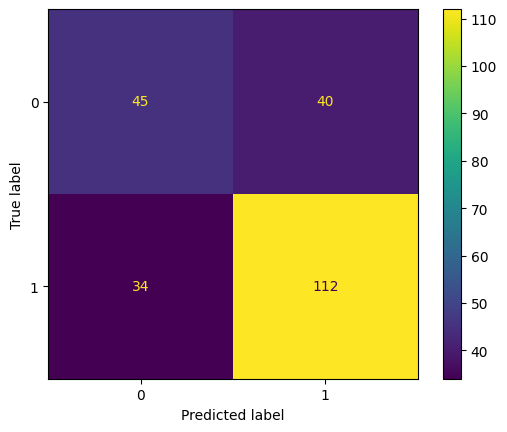

In [17]:
# Acurácia do modelo, quanto frequentemnete ele está correto?
print("Acurácia:", metrics.accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=[1,0])
# Matriz de confusão do modelo 
ConfusionMatrixDisplay(cm).plot()



